In [5]:
import sys, os

sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize = True, one_hot_label = True)
  
print(x_train.shape)

(60000, 784)


In [3]:
print(t_train.shape)

(60000, 10)


In [13]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

IndexError: index 52824 is out of bounds for axis 0 with size 10

In [17]:
np.random.choice(60000, 10)

array([28836,  7269, 33657, 15182,  2340, 35376, 53523,  1418, 44954,
       38853])

In [16]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [18]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [ ]:
# 나쁜 구현의 예
def numerical_diff(f, x):
    h = 10e-50
    return(f(x + h) - f(x)) / h


In [37]:
np.float32(1e-50)

0.0

In [46]:
def numerical_diff(f,x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [39]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

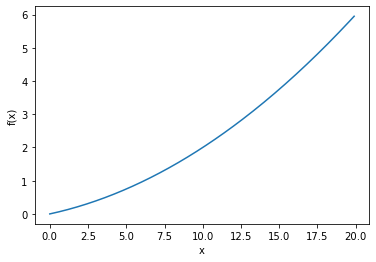

In [40]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [47]:
numerical_diff(function_1,5)

0.1999999999990898

In [48]:
numerical_diff(function_1,10)

0.2999999999986347

0.2999999999986347


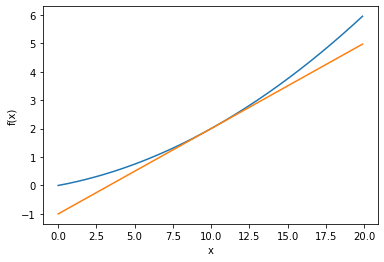

In [51]:
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 10)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

In [59]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [53]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [55]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [65]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        #f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [68]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [2]:
import torch